In [2]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [5]:
base_dir = os.getcwd()
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        print(i * batch_size,':', (i + 1) * batch_size)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 750)
validation_features, validation_labels = extract_features(val_dir, 330)
test_features, test_labels = extract_features(test_dir, 330)

Found 1495 images belonging to 2 classes.
0 : 10
10 : 20
20 : 30
30 : 40
40 : 50
50 : 60
60 : 70
70 : 80
80 : 90
90 : 100
100 : 110
110 : 120
120 : 130
130 : 140
140 : 150
150 : 160
160 : 170
170 : 180
180 : 190
190 : 200
200 : 210
210 : 220
220 : 230
230 : 240
240 : 250
250 : 260
260 : 270
270 : 280
280 : 290
290 : 300
300 : 310
310 : 320
320 : 330
330 : 340
340 : 350
350 : 360
360 : 370
370 : 380
380 : 390
390 : 400
400 : 410
410 : 420
420 : 430
430 : 440
440 : 450
450 : 460
460 : 470
470 : 480
480 : 490
490 : 500
500 : 510
510 : 520
520 : 530
530 : 540
540 : 550
550 : 560
560 : 570
570 : 580
580 : 590
590 : 600
600 : 610
610 : 620
620 : 630
630 : 640
640 : 650
650 : 660
660 : 670
670 : 680
680 : 690
690 : 700
700 : 710
710 : 720
720 : 730
730 : 740
740 : 750
Found 664 images belonging to 2 classes.
0 : 10
10 : 20
20 : 30
30 : 40
40 : 50
50 : 60
60 : 70
70 : 80
80 : 90
90 : 100
100 : 110
110 : 120
120 : 130
130 : 140
140 : 150
150 : 160
160 : 170
170 : 180
180 : 190
190 : 200
200 : 2

In [9]:
train_features = np.reshape(train_features, (750, 4*4* 512))
validation_features = np.reshape(validation_features, (330, 4*4* 512))
test_features = np.reshape(test_features, (330, 4*4* 512))

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 750 samples, validate on 330 samples
Epoch 1/30
750/750 [==============================] - 2s 2ms/sample - loss: 0.6950 - acc: 0.5853 - val_loss: 0.6202 - val_acc: 0.6455
Epoch 2/30
750/750 [==============================] - 0s 603us/sample - loss: 0.5863 - acc: 0.6787 - val_loss: 0.5825 - val_acc: 0.7030
Epoch 3/30
750/750 [==============================] - 0s 594us/sample - loss: 0.5427 - acc: 0.7427 - val_loss: 0.5629 - val_acc: 0.6758
Epoch 4/30
750/750 [==============================] - 0s 589us/sample - loss: 0.5050 - acc: 0.7493 - val_loss: 0.5473 - val_acc: 0.7152
Epoch 5/30
750/750 [==============================] - 0s 609us/sample - loss: 0.4598 - acc: 0.8013 - val_loss: 0.5329 - val_acc: 0.7091
Epoch 6/30
750/750 [==============================] - 0s 657us/sample - loss: 0.4271 - acc: 0.8027 - val_loss: 0.5269 - val_acc: 0.7364
Epoch 7/30
750/750 [==============================] - 0s 592us/sample - loss: 0.4020 - acc: 0.8107 - val_loss: 0.5171 - val_acc: 0.7303
Epoc

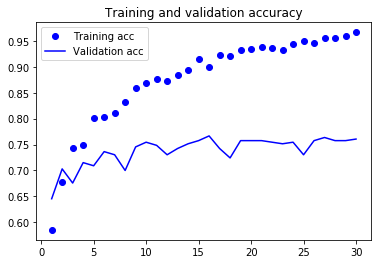

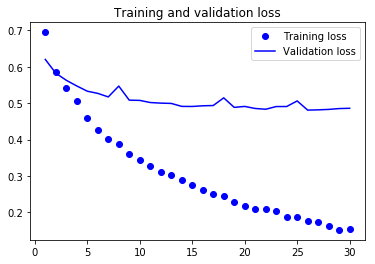

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()